# iRIS画像認識

**画像認識**

**KaggleのiRISを活用**

**通常の全結合層のNNを活用**

**ライブラリは、Numpyを活用**


データ読み込み完了
Generation: 10. 誤差 = 46.00887219232763
Generation: 20. 誤差 = 31.458712442019536
Generation: 30. 誤差 = 28.79764011680708
Generation: 40. 誤差 = 29.527309752047543
Generation: 50. 誤差 = 27.222713205355316
Generation: 60. 誤差 = 24.00212112025752
Generation: 70. 誤差 = 20.792831482523674
Generation: 80. 誤差 = 21.509739862072472
Generation: 90. 誤差 = 23.550540700912975
Generation: 100. 誤差 = 24.40419317480079
Generation: 110. 誤差 = 18.20295506631813
Generation: 120. 誤差 = 18.05984820516014
Generation: 130. 誤差 = 18.144849848454527
Generation: 140. 誤差 = 19.856451670790634
Generation: 150. 誤差 = 16.34291690009372
Generation: 160. 誤差 = 15.065979915394012
Generation: 170. 誤差 = 13.224513470461998
Generation: 180. 誤差 = 12.8167975166458
Generation: 190. 誤差 = 11.366673573894811
Generation: 200. 誤差 = 10.012320852331676
Generation: 210. 誤差 = 10.955837892838511
Generation: 220. 誤差 = 9.693443799493421
Generation: 230. 誤差 = 7.73077232036927
Generation: 240. 誤差 = 6.727640281983779
Generation: 250. 誤差 = 7.8506

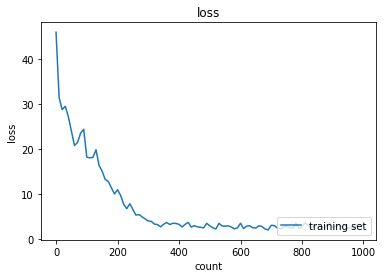

In [3]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import functions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from common import optimizer

iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

# irisをロード
x_train, x_test, d_train, d_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=0,)
train_size = len(x_train)

print("データ読み込み完了")
# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 3
#中間層サイズ
hidden_layer_1_size = 10
hidden_layer_2_size = 5
#出力層サイズ
output_layer_size = 1
# 繰り返し数
iters_num = 1000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate=0.01
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 
    # Heの初期値
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / np.sqrt(input_layer_size) * np.sqrt(2)
    network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / np.sqrt(hidden_layer_1_size) * np.sqrt(2)
    network['W3'] = np.random.randn(hidden_layer_2_size, output_layer_size) / np.sqrt(hidden_layer_2_size) * np.sqrt(2)
    
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)
    
    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    hidden_f = functions.relu
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = u3
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    hidden_d_f = functions.d_relu
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

losses = []
accuracies_train = []
accuracies_test = []
    
for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]
    d_batch = d_batch[:, np.newaxis]
    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)
    
    # SGD =====================================================
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]
    # =========================================================
    
   
    if (i + 1) % plot_interval == 0:
        loss = functions.least_square(d_batch, y)
        losses.append(loss)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, losses, label="training set")
plt.legend(loc="lower right")
plt.title("loss")
plt.xlabel("count")
plt.ylabel("loss")
# グラフの表示
plt.show()